 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [200]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [201]:
# Reading whale returns
Whales_path = Path('Resources/whale_returns.csv')



In [202]:
Whales_df = pd.read_csv(Whales_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
Whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [203]:
# Drop nulls
Whales_df = Whales_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [204]:
# Reading algorithmic returns
Algo_path = Path('Resources/algo_returns.csv')

In [205]:
Algo_df = pd.read_csv(Algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
Algo_df.dropna
Algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [206]:
# Count nulls
Algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [207]:
# Drop nulls
Algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829



## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [208]:
# Reading S&P 500 Closing Prices
SP_path = Path('Resources/sp500_history.csv')


In [209]:
# Check Data Types
SP_df = pd.read_csv(SP_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP_df.dtypes


Close    object
dtype: object

In [210]:
# Fix Data Types

SP_df["Close"] = SP_df["Close"].str.replace("$", "")
SP_df.head()
SP_df["Close"] = SP_df["Close"].astype("float")
SP_df.dtypes


Close    float64
dtype: object

In [211]:
SP_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [212]:
# Calculate Daily Returns
daily_return = SP_df.pct_change()
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [213]:
# Drop nulls

daily_return.dropna(inplace=True)
daily_return

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [214]:
# Rename `Close` Column to be specific to this portfolio.
daily_return = daily_return.rename(columns={"Close":"S&P500"})
daily_return.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [215]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([Whales_df, Algo_df, daily_return], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'S&P 500 daily returns'}, xlabel='Date'>

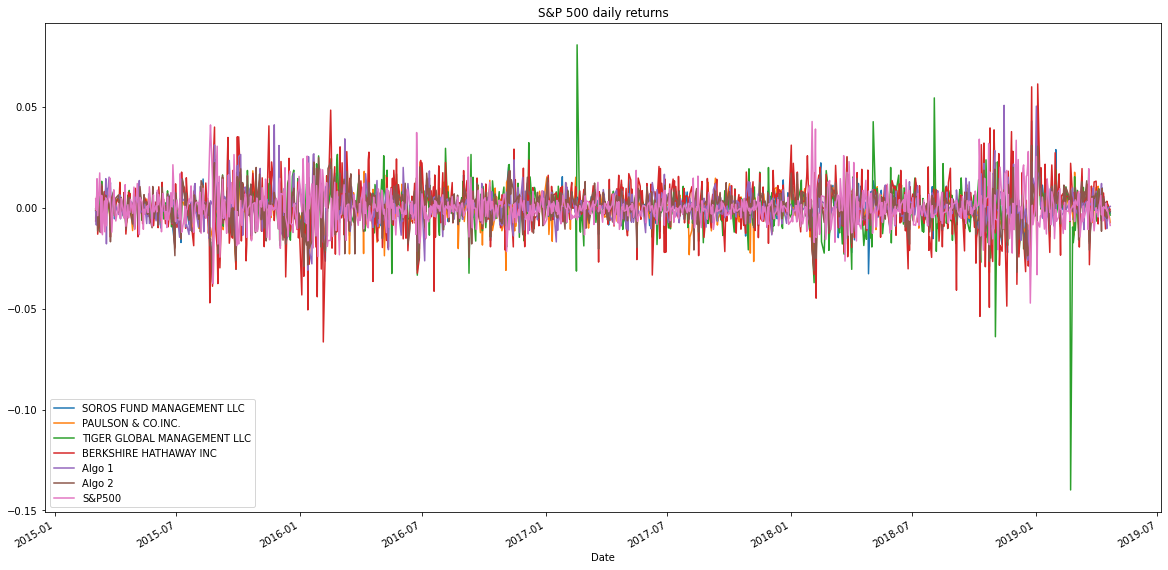

In [216]:
# Plot daily returns of all portfolios
combined_df.plot(title='S&P 500 daily returns', figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

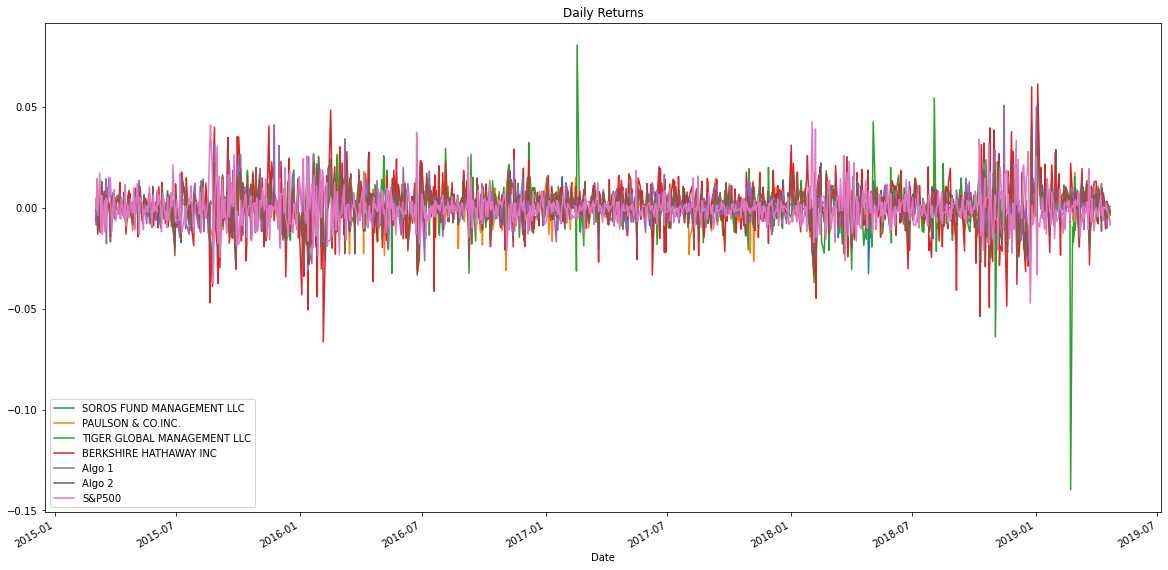

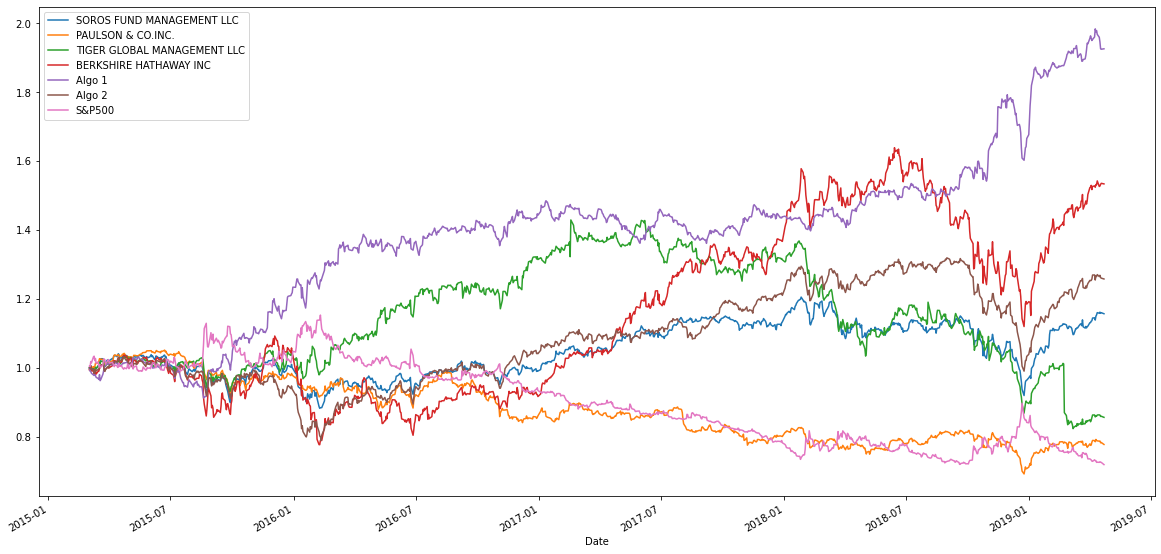

In [217]:
# Calculate cumulative returns of all portfolios
combined_df.plot( title="Daily Returns" , figsize=(20,10))
# Plot cumulative returns
combined_portfolios_df_cumulative_returns = (1 + combined_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation


##create a box plot

<AxesSubplot:title={'center':'Risk Portfolio'}>

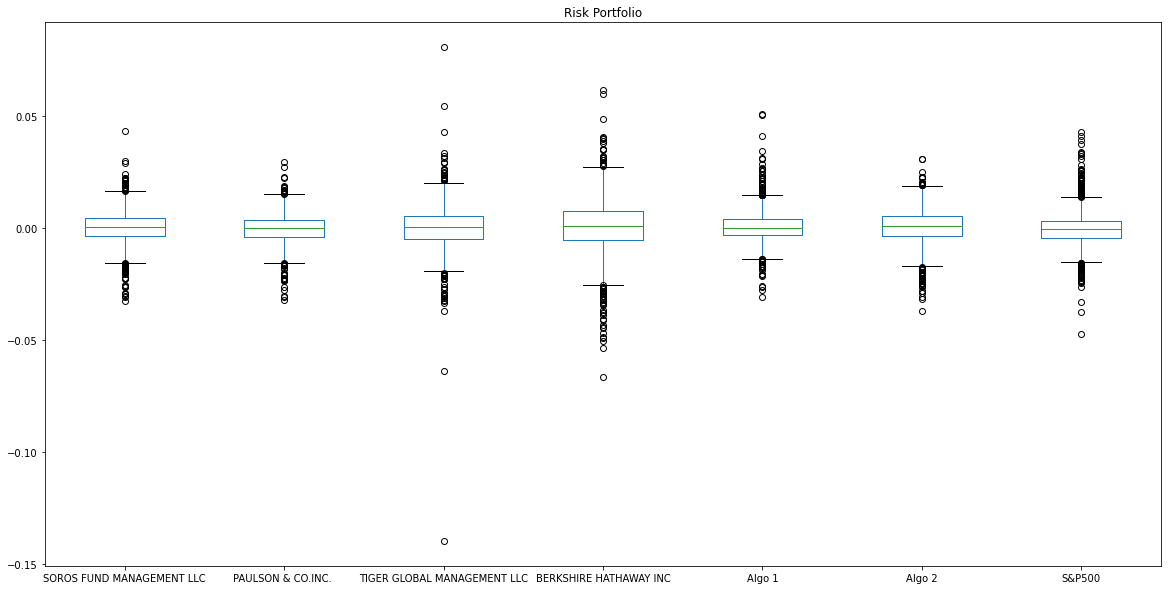

In [218]:
# Box plot to visually show risk
combined_df.plot.box(title= "Risk Portfolio", figsize=(20,10))


### Calculate Standard Deviations

In [219]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std().sort_values(ascending=False )
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [220]:
# Calculate  the daily standard deviation of S&P 500
SP_riskier = daily_std > daily_std['S&P500']
SP_riskier
# Determine which portfolios are riskier than the S&P 500


BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P500                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [221]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)


BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 day window'}, xlabel='Date'>

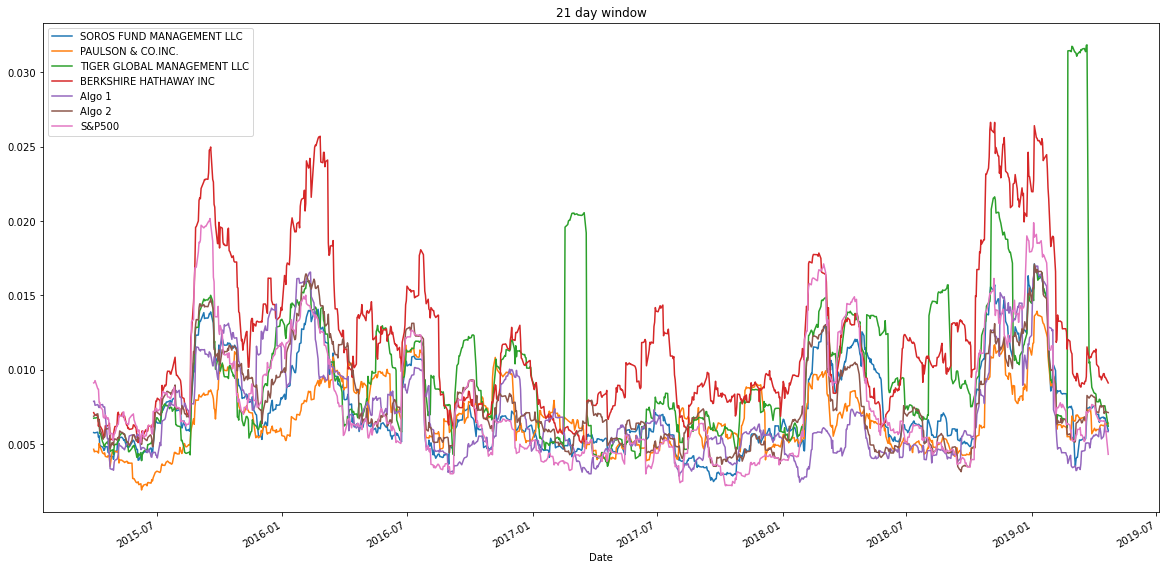

In [222]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(20,10), title= "21 day window" )
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [227]:
# Calculate the correlation
corr_df = combined_df.corr()
# Display de correlation matrix
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

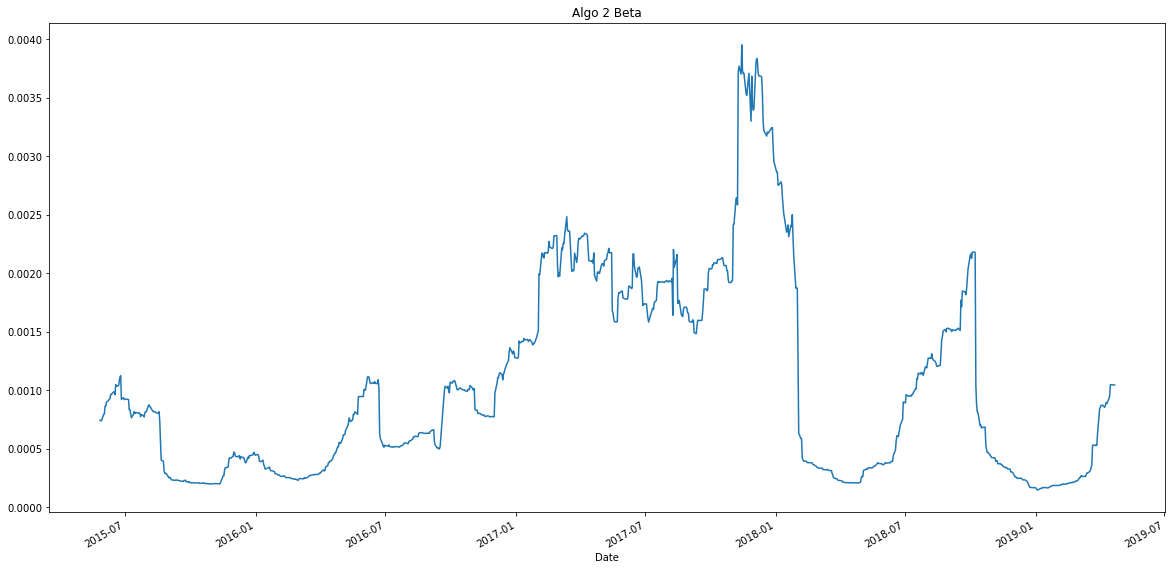

In [247]:
#  Calculate covariance of a single portfolio
cov_df = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df["S&P500"])
# Calculate variance of S&P 500
var_df = combined_df["S&P500"].rolling(window=60).var()
# Computing beta
algo_1_beta = cov_df / var_df
algo_1_beta_plot = algo_1_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Weighted Average'}, xlabel='Date'>

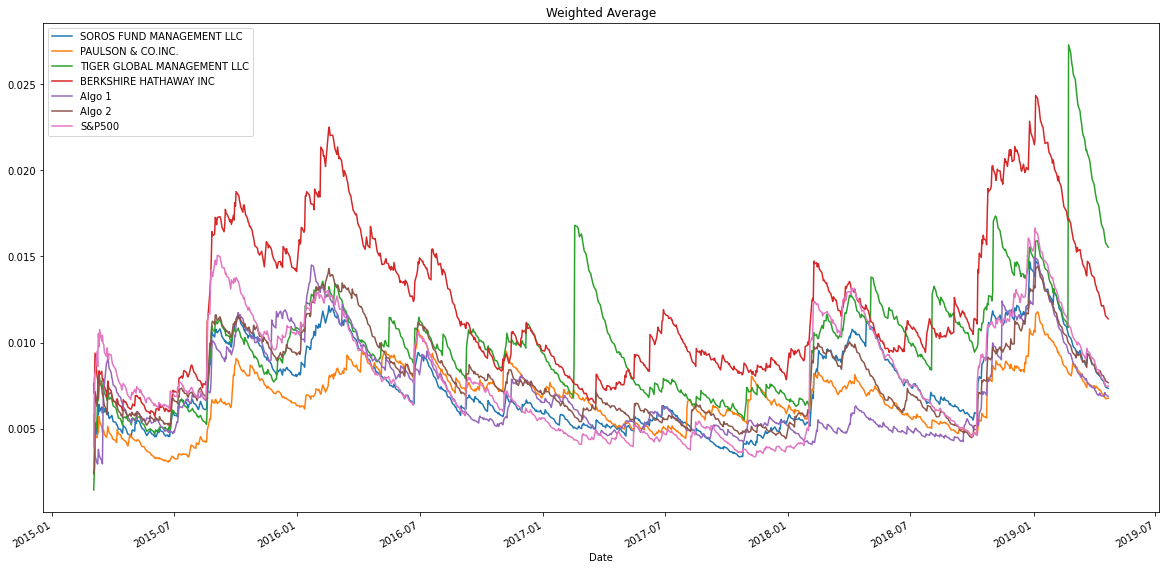

In [229]:
# Use `ewm` to calculate the rolling window
rolling_df = combined_df.ewm(halflife=21,adjust=True).std().plot(title="Weighted Average", figsize=(20, 10))
rolling_df 

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [230]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

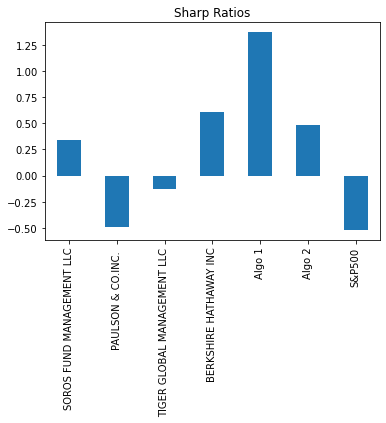

In [231]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= "bar", title="Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! Yes

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [232]:
# Reading data from 1st stock = Path("Resources/amd.csv")
csv_goog = Path('Resources/goog_historical.csv')
google = pd.read_csv(csv_goog, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [233]:
# Reading data from 2nd stock
apple = Path('Resources/aapl_historical.csv')
apple = pd.read_csv(apple, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [234]:
# Reading data from 3rd stock
costco = Path('Resources/cost_historical.csv')
costco= pd.read_csv(costco , index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [235]:
csv_spx = Path('Resources/SPX.csv')
spx = pd.read_csv(csv_spx, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
spx.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,SPX,2727.72
2018-05-14,SPX,2730.13
2018-05-15,SPX,2711.45
2018-05-16,SPX,2722.46
2018-05-17,SPX,2720.13


In [236]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([apple, google, costco, spx], axis = 'columns', join = 'inner')
combined_stocks_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,,,
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34,SPX,2879.42
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18,SPX,2884.05
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23,SPX,2932.47
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62,SPX,2945.64
2019-05-02,AAPL,209.15,GOOG,1162.61,COST,242.69,SPX,2917.52


In [237]:
# Reset Date index


In [238]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df.reset_index(inplace=True)
combined_stocks_df = pd.concat([apple, google, costco, spx], axis = 'rows', join = 'inner')
combined_stocks_df = combined_stocks_df.pivot_table(values='NOCP',  index='Trade DATE', columns='Symbol')
combined_stocks_df.head()

Symbol,AAPL,COST,GOOG,SPX
Trade DATE,,,,
2018-05-11,188.59,195.76,1098.26,2727.72
2018-05-14,188.15,195.88,1100.20,2730.13
2018-05-15,186.44,195.48,1079.23,2711.45
2018-05-16,188.18,198.71,1081.77,2722.46
2018-05-17,186.99,199.60,1078.59,2720.13


In [239]:
# Calculate daily returns
daily_returns = combined_stocks_df.pct_change()
daily_returns.head()

# Drop NA
daily_returns.dropna()
# play sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG,SPX
Trade DATE,,,,
2018-05-11,NaN,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766,0.000884
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842
2018-05-16,0.009333,0.016523,0.002354,0.004061
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [240]:
# Set weights
weights = [1/4, 1/4, 1/4,1/4]

weights_returns = daily_returns.dot(weights)
weights_returns.dropna()


# Calculate portfolio return
weights_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000232
2018-05-15   -0.009258
2018-05-16    0.008068
2018-05-17   -0.001410
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [241]:
# Join your returns DataFrame to the original returns DataFrame
combined_dataframe= pd.DataFrame({"AAPL": daily_returns["AAPL"], "COST": daily_returns["COST"], "GOOG": daily_returns["GOOG"],"spx": daily_returns["SPX"], "Retruns": weights_returns})
combined_dataframe.head()

,AAPL,COST,GOOG,spx,Retruns
Trade DATE,,,,,
2018-05-11,NaN,NaN,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766,0.000884,0.000232
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842,-0.009258
2018-05-16,0.009333,0.016523,0.002354,0.004061,0.008068
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856,-0.001410


In [242]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_dataframe.dropna()

,AAPL,COST,GOOG,spx,Retruns
Trade DATE,,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000884,0.000232
2018-05-15,-0.009088,-0.002042,-0.019060,-0.006842,-0.009258
2018-05-16,0.009333,0.016523,0.002354,0.004061,0.008068
2018-05-17,-0.006324,0.004479,-0.002940,-0.000856,-0.001410
2018-05-18,-0.003637,-0.003206,-0.011339,-0.002632,-0.005204
...,...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.009638,0.012406
2019-05-06,-0.015443,-0.001594,0.003366,-0.004471,-0.004536
2019-05-07,-0.026957,-0.016583,-0.012855,-0.016512,-0.018227


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [243]:
# Calculate the annualized `std`
Combined_returns_std  = daily_returns.std()
combined_annualized_std = Combined_returns_std * np.sqrt(252)
combined_annualized_std

Symbol
AAPL    0.296955
COST    0.209320
GOOG    0.263554
SPX     0.149999
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations'}, xlabel='Trade DATE'>

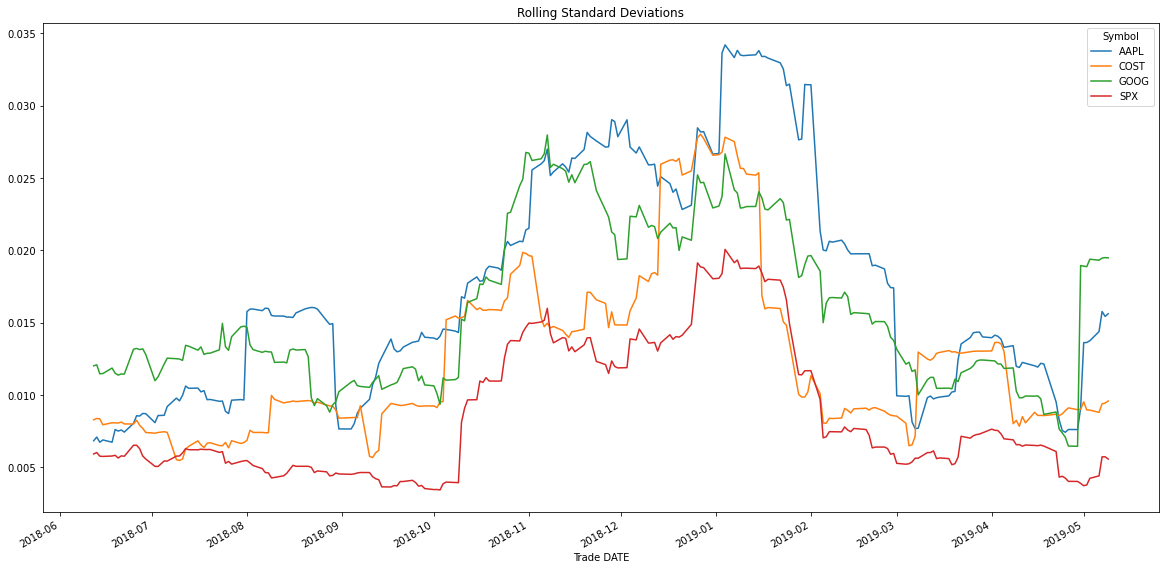

In [244]:
# Calculate rolling standard deviation
daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviations")
# Plot rolling standard deviation


### Calculate and plot the correlation

In [245]:
# Calculate and plot the correlation
combined_corr = daily_returns.corr()
combined_corr

Symbol,AAPL,COST,GOOG,SPX
Symbol,,,,
AAPL,1.000000,0.413546,0.655007,0.739131
COST,0.413546,1.000000,0.385145,0.591067
GOOG,0.655007,0.385145,1.000000,0.755036
SPX,0.739131,0.591067,0.755036,1.000000


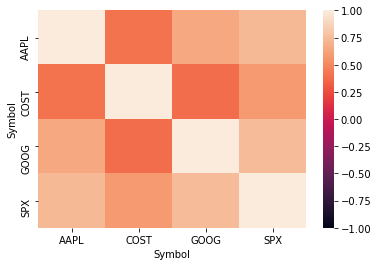

In [246]:
combined_plot=sns.heatmap(combined_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [261]:
# Calculate and plot Beta
rolling_aapl_cov = daily_returns['AAPL'].rolling(window=60).cov(daily_returns['SPX'])
rolling_goog_cov = daily_returns['GOOG'].rolling(window=60).cov(daily_returns["SPX"])
rolling_cost_cov = daily_returns['COST'].rolling(window=60).cov(daily_returns["SPX"])

rolling_variance = daily_returns["SPX"].rolling(window=60).var()

rolling_aapl_beta = rolling_aapl_cov / rolling_variance
rolling_goog_beta = rolling_goog_cov / rolling_variance
rolling_cost_beta = rolling_cost_cov / rolling_variance
rolling_cost_beta

Trade DATE
2018-05-11         NaN
2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
                ...   
2019-05-03    0.738283
2019-05-06    0.700429
2019-05-07    0.751889
2019-05-08    0.747096
2019-05-09    0.721840
Length: 250, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

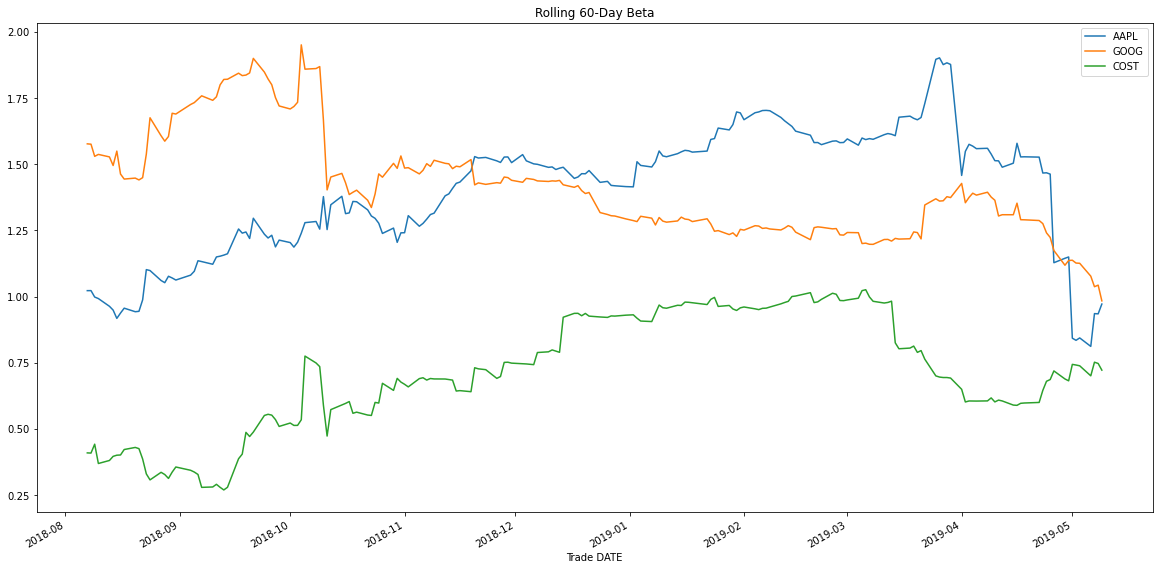

In [266]:
#Set the figure and plot the different datasets as mutiple trends on the same figure
ax = rolling_aapl_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta")
rolling_goog_beta.plot(ax=ax)
rolling_cost_beta.plot(ax=ax)

#Set the legend of the figure
ax.legend(["AAPL","GOOG","COST"])

In [267]:
#Calculate Annualized Sharpe Ratios
sharp_ratio_2 = ((daily_returns.mean()-daily_returns["SPX"].mean()) * 252) / (daily_returns.std() * np.sqrt(252))
sharp_ratio_2

Symbol
AAPL    0.139090
COST    0.845232
GOOG    0.099279
SPX     0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratiosn Stocks'}, xlabel='Symbol'>

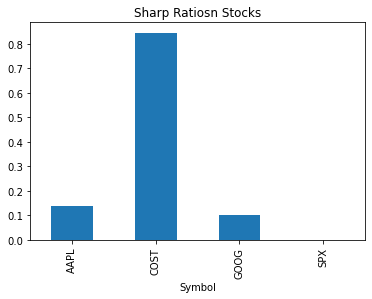

In [269]:
#Visualize the sharpe rstios as a bar plot
sharp_ratio_2.plot(kind="bar", title="Sharp Ratiosn Stocks")

### How does your portfolio do?

Write your answer here!